Luiz Otávio Teixeira Mello

William Tsuyoshi Matsuda

Giovanna Contato Vessoni

# Bibliotecas e Dataset


In [ ]:
!pip install hdbscan

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
from hdbscan.validity import validity_index as dbcv

dados em https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data

<h3>Por que é relevante?</h3>

* Este dataset visa determinar os diferentes grupos de clientes cadastrados de uma certa loja. Entendemos que é relevante por as empresas demandarem tal serviço, pois definindo quem são seus clientes, podem personalizar seus serviços de maneira que agrade a clientela.

<h3>Por que é desafiador?</h3>

* Nosso grupo achou o dataset desafiador por nunca ter mexido com datasets que envolviam clientes de loja, então precisamos fazer uma análise rebuscada para entender quem são os clientes e quais suas especifidades.

<h3>Por que e complexo?</h3>

* Não é especificado qual é o serviço ofertado pela loja do conjunto de dados. Então precisamos entender como funciona os atributos para podermos tirar resultados confiáveis.

<h3> Descrição dos atributos </h3>

* **Id**: Identificador único de cada cliente

* **Year_Birth**: Ano de nascimento

* **Education**: Nível de educação

* **Marital_Status**: Estado Civil

* **Income**: Renda anual

* **Kidhome**: Número de crianças em casa

* **Teenhome**: Número de adolescentes em casa

* **Dt_Customer**: data em que o cliente foi adicionado no banco de dados da empresa pela primeira vez

* **Recency**: Número de dias desde a última interação ou compra

* **MntWines**: O valor gasto em vinhos

* **MntFruits**: O valor gasto em frutas

* **MntMeatProducts**: O valor gasto em produtos cárneos.

* **MntFishProducts**: O valor gasto em peixes.

* **MntSweetProducts**: O valor gasto em produtos doces

* **MntGoldProds**: O valor gasto em produtos de ouro

* **NumDealsPurchases**: O número de compras feitas com desconto ou como parte de uma oferta

* **NumWebPurchases**: O número de compras realizadas através do site da empresa

* **NumCatalogPurchases**: O número de compras feitas por meio de catálogos.

* **NumStorePurchases**: O número de compras feitas em lojas físicas

* **NumWebVisitsMonth**: O número de visitas ao site da empresa em um mês

* **AcceptedCmp3**: Indicador binário (1 ou 0) se o indivíduo aceitou a terceira campanha de marketing

* **AcceptedCmp4**: Indicador binário (1 ou 0) se o indivíduo aceitou a quarta campanha de marketing.

* **AcceptedCmp5**: Indicador binário (1 ou 0) se o indivíduo aceitou a quinta campanha de marketing.

* **AcceptedCmp1**: Indicador binário (1 ou 0) se o indivíduo aceitou a primeira campanha de marketing.

* **AcceptedCmp2**: Indicador binário (1 ou 0) se o indivíduo aceitou a segunda campanha de marketing.

* **Complain**: Indicador binário (1 ou 0) se o indivíduo fez alguma reclamação.

* **Z_CostContact**: Um custo constante associado ao contato com um cliente.

* **Z_Revenue**: Uma receita constante associada a uma resposta de campanha bem-sucedida.

* **Response**: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)

try:
    df = pd.read_csv('/content/drive/MyDrive/UFSCar/5_semestre/AM/customer_segmentation.csv')
except:
    df = pd.read_csv('/content/customer_segmentation.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Análise Exploratória e Pré-Processamento

Começamos visualizando algumas informações como valores nulos, tipo de dado de cada atributo, valores duplicados.

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Como os valores nulos representam 1% apenas do dataset, podemos retirá-la, porém como são clientes reais e queremos agrupá-los também, é preferível que continuemos nossa análise com eles.

In [ ]:
average_income = df['Income'].median()
df.fillna({'Income': average_income}, inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Identificador Único é irrelevante para a ánalise.

In [ ]:
df = df.drop('ID', axis=1) # identificador único de cada cliente, não precisamos dessa informação

## Tratando dados categóricos em formato de string

'Dt_Customer' está em formato de string. Vamos mudar para inteiros e categorizálos.

In [ ]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: int(x[6:])) # pegar o ano apenas
df['Dt_Customer']

,Dt_Customer
0,2012
1,2014
2,2013
3,2014
4,2014
...,...
2235,2013
2236,2014
2237,2014
2238,2014


<BarContainer object of 2240 artists>

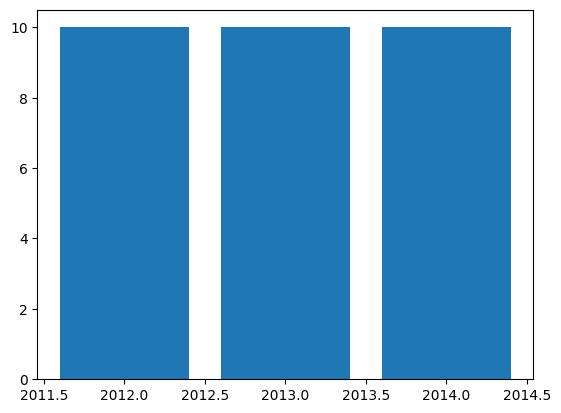

In [ ]:
plt.bar(df['Dt_Customer'], height=10)

In [ ]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: x - 2011) # transformar os anos em 1, 2 e 3
df['Dt_Customer']

,Dt_Customer
0,1
1,3
2,2
3,3
4,3
...,...
2235,2
2236,3
2237,3
2238,3


In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1,'2n Cycle': 2, 'Master': 3, 'PhD': 4})
df['Education']

,Education
0,1
1,1
2,1
3,1
4,4
...,...
2235,1
2236,4
2237,1
2238,3


In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 0, 'Absurd': 0, 'YOLO': 0})

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
2,864
1,580
0,487
3,232
4,77


In [ ]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2023 - x)
df = df.drop('Year_Birth', axis=1)
df['Age']


,Age
0,66
1,69
2,58
3,39
4,42
...,...
2235,56
2236,77
2237,42
2238,67


# Mais Alguns Tratamentos Pós Transformação

In [ ]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,2.047768,1.478571,52237.975446,0.444196,0.506250,2.028125,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,1.277120,1.047972,25037.955891,0.538398,0.544538,0.684554,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,0.000000,1730.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,1.000000,1.000000,35538.750000,0.000000,0.000000,2.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,1.000000,2.000000,51381.500000,0.000000,0.000000,2.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,3.000000,2.000000,68289.750000,1.000000,1.000000,2.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,4.000000,4.000000,666666.000000,2.000000,2.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [ ]:
#Percebe-se que possui colunas com std == 0 (Z_costContact e Z_revenue) \
#, que significa que eles não possuem variação, então podemos remover
columns_to_remove = df.std()[df.std() == 0].index

df = df.drop(columns=columns_to_remove)

## Alguns Outliers

Pela figura abaixo, é possível ver outliers na renda e nas idades. No caso da idade preferimos retirar os clientes com tais idades maiores que 120 anos (a pessoa mais velha registrada morreu com 117). Já o outlier de renda decidimos continuar com ele, pois outliers existem e devem ser considerados. Precisamos apenas tratá-lo

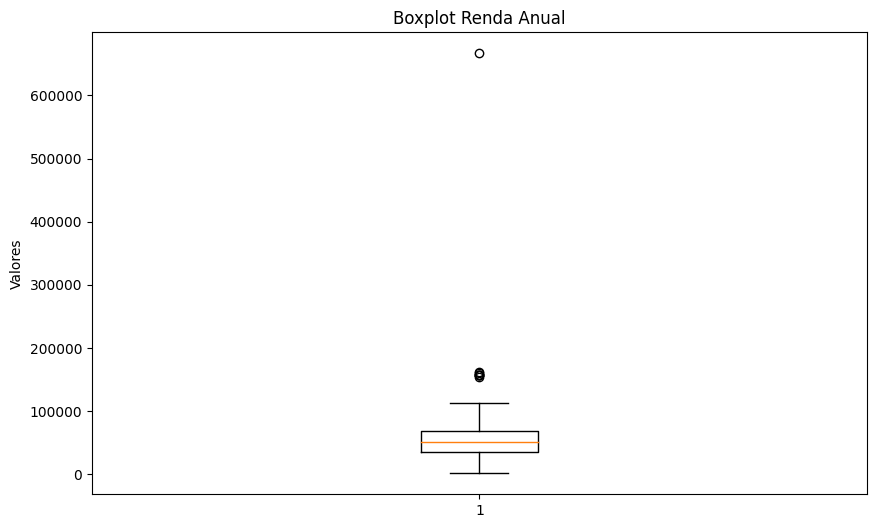

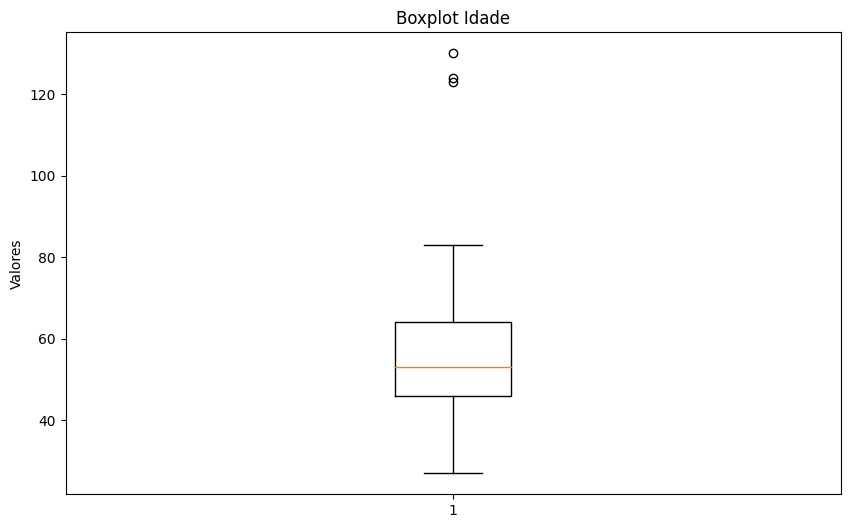

In [ ]:
# detectar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Income'])
plt.title('Boxplot Renda Anual')
plt.ylabel('Valores')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'])
plt.title('Boxplot Idade')
plt.ylabel('Valores')
plt.show()

In [ ]:
df = df[df['Age'] <= 120]

# Análise univariada

Education
1    50.379973
4    21.680823
3    16.540009
2     8.985248
0     2.413947
Name: proportion, dtype: float64


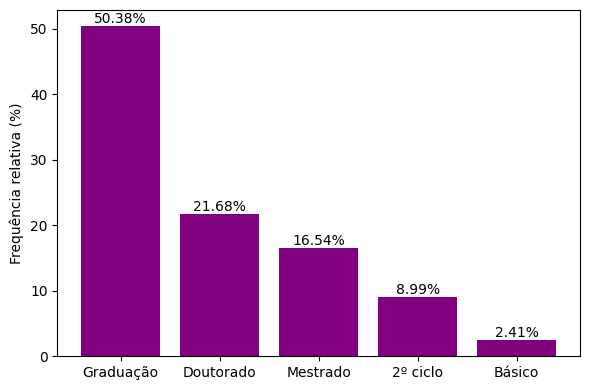

In [ ]:
# Contagem dos níveis de escolaridade em frequência relativa (percentual)
mapa_educacao = {0: 'Básico', 1: 'Graduação', 2: '2º ciclo', 3: 'Mestrado', 4: 'Doutorado'} # novos nomes

contagem_niveis = df['Education'].value_counts(normalize=True) * 100  # Convertendo para porcentagem

print(contagem_niveis)

# Criando uma figura
plt.figure(figsize=(6,4))

# Gráfico de barras: Frequência relativa dos níveis de escolaridade
# plt.bar(contagem_niveis.index, contagem_niveis, color='purple')
#plt.title('Níveis de Escolaridade dos Clientes')
plt.ylabel('Frequência relativa (%)')

# Substituindo os nomes das categorias do eixo x
# novos_nomes = ['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado']
# plt.xticks(ticks=range(len(novos_nomes)), labels=novos_nomes)

contagem_niveis.index = contagem_niveis.index.map(mapa_educacao)
plt.bar(contagem_niveis.index, contagem_niveis, color='purple')

# Anotando as barras com a frequência relativa
for i, valor in enumerate(contagem_niveis):
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Salvando o gráfico como uma imagem PNG
plt.savefig('escolaridade.png')

# Exibindo o gráfico
plt.show()



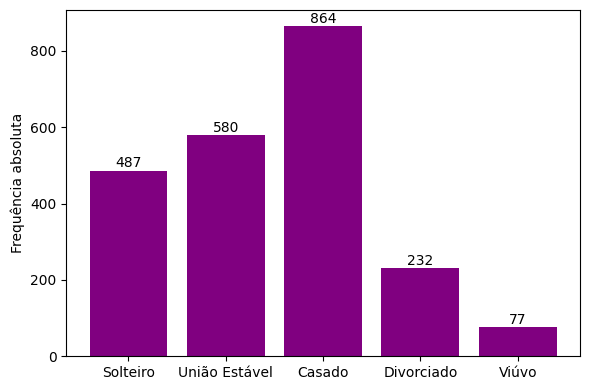

In [ ]:
contagem = df['Marital_Status'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(contagem.index, contagem, color='purple')
# plt.title('Estado civil dos clientes')
plt.ylabel('Frequência absoluta')

# Substituindo os nomes das categorias do eixo x
novos_nomes = ['Solteiro', 'União Estável', 'Casado', 'Divorciado', 'Viúvo']  # Substitua com os nomes desejados
plt.xticks(range(len(novos_nomes)), novos_nomes)

# Anotando as barras com a contagem para fazer os rotulos das barras
contagem = [ 487, 580, 864,  232, 77]
for i, valor in enumerate(contagem):
    plt.text(i, valor, str(valor), ha='center', va='bottom')



plt.tight_layout()  #Ajustando o layout para evitar sobreposição

plt.savefig("estadocivil")

plt.show()


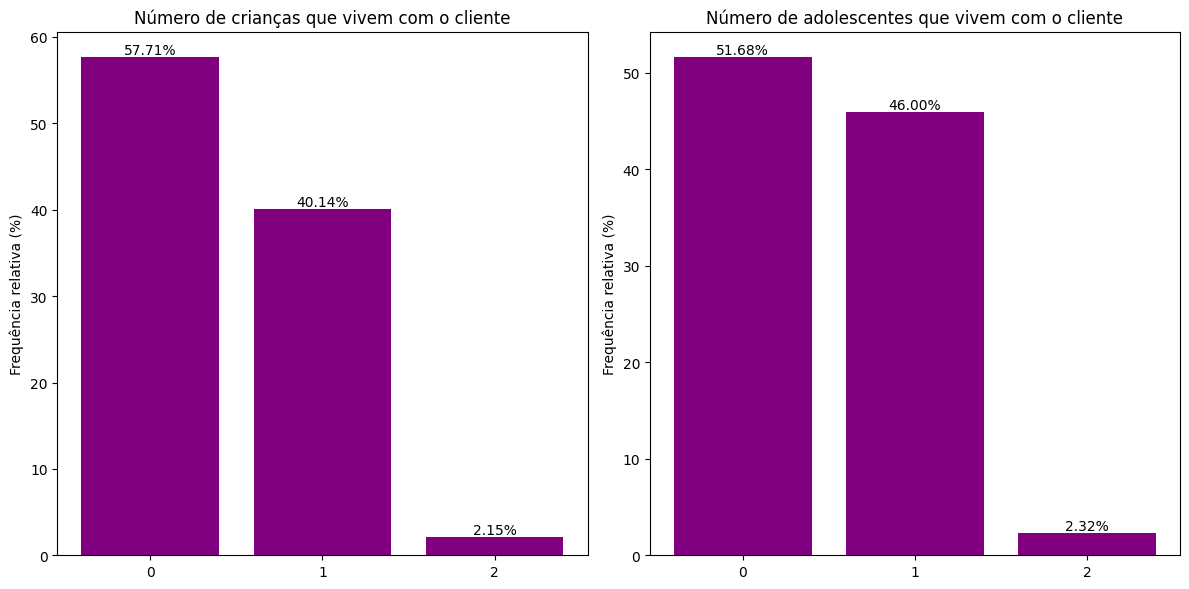

In [ ]:
# Contagem das crianças que vivem com o cliente em frequência relativa
contagem_kids = df['Kidhome'].value_counts(normalize=True) * 100  # Convertendo para porcentagem

# Contagem dos adolescentes que vivem com o cliente em frequência relativa
contagem_teens = df['Teenhome'].value_counts(normalize=True) * 100  # Convertendo para porcentagem

# Criando uma figura com dois subplots
plt.figure(figsize=(12, 6))

# Primeiro gráfico de barras: Número de crianças (frequência relativa)
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro subplot
plt.bar(contagem_kids.index, contagem_kids, color='purple')
plt.title('Número de crianças que vivem com o cliente')
plt.ylabel('Frequência relativa (%)')

# Substituindo os nomes das categorias do eixo x
novos_nomes = ['0', '1', '2']  # Substitua com os nomes desejados
plt.xticks(range(len(novos_nomes)), novos_nomes)

# Anotando as barras com a contagem relativa
for i, valor in enumerate(contagem_kids):
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

# Segundo gráfico de barras: Número de adolescentes (frequência relativa)
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo subplot
plt.bar(contagem_teens.index, contagem_teens, color='purple')
plt.title('Número de adolescentes que vivem com o cliente')
plt.ylabel('Frequência relativa (%)')

# Substituindo os nomes das categorias do eixo x
plt.xticks(range(len(novos_nomes)), novos_nomes)

# Anotando as barras com a contagem relativa
for i, valor in enumerate(contagem_teens):
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

plt.savefig("f")
# Exibindo o gráfico
plt.show()


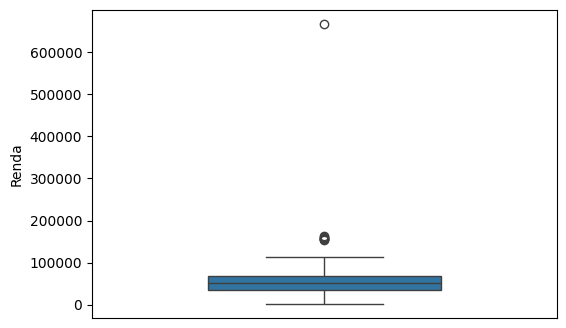

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=df[['Income']], width=0.5)
# plt.title('Boxplot da renda anual dos clientes')
plt.ylabel('Renda')
plt.xticks([])

plt.savefig('renda.png')

# Exibindo o gráfico
plt.show()


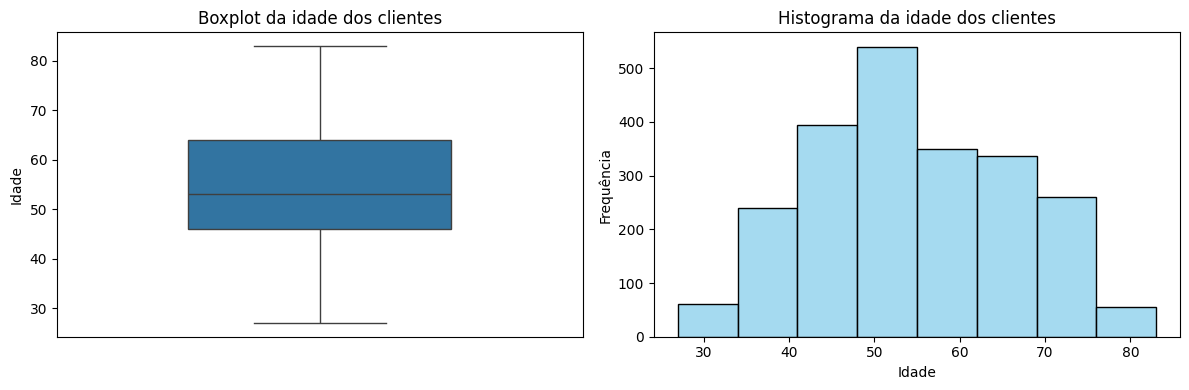

In [ ]:
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro subplot
sns.boxplot(data=df[['Age']], width=0.5)  # Ajustando a largura da caixa do boxplot
plt.title('Boxplot da idade dos clientes')
plt.ylabel('Idade')
plt.xticks([])  # Removendo o nome do eixo x

# Histograma
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo subplot
sns.histplot(df['Age'], bins=8, color='skyblue', edgecolor='black')  # Ajustando o número de bins e as cores
plt.title('Histograma da idade dos clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.tight_layout()  # Ajustando o layout para evitar sobreposição de elementos

plt.show()

# Análise bivariada

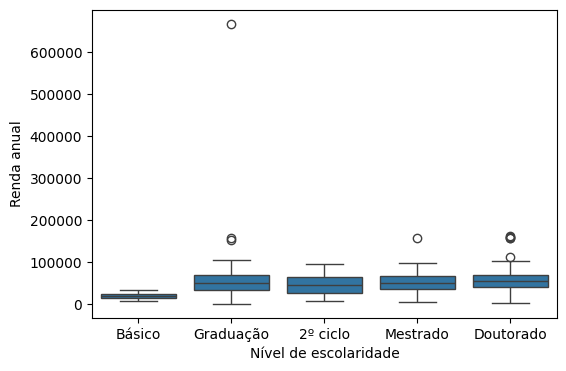

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Education', 'Income']], x='Education', y='Income')
# plt.title('Boxplot da renda anual em relação \n ao  nível de escolaridade do cliente')
plt.xlabel('Nível de escolaridade')
plt.ylabel('Renda anual')
plt.xticks([0, 1,2,3,4], ['Básico', 'Graduação','2º ciclo', 'Mestrado', 'Doutorado'])

plt.savefig('renda_escolaridade.png')
plt.show()

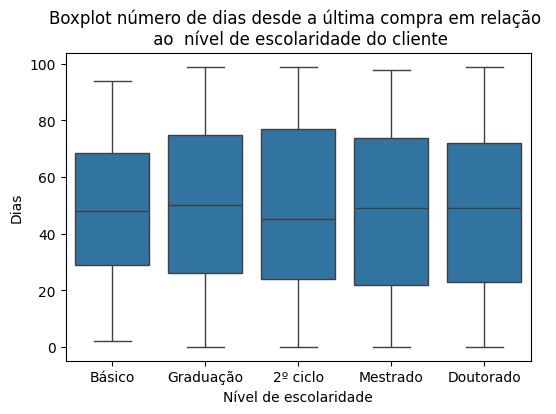

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Education', 'Recency']], x='Education', y='Recency')
plt.title('Boxplot número de dias desde a última compra em relação \n ao  nível de escolaridade do cliente')
plt.xlabel('Nível de escolaridade')
plt.ylabel('Dias')
plt.xticks([0, 1,2,3,4], ['Básico', 'Graduação','2º ciclo', 'Mestrado', 'Doutorado'])

plt.savefig('b.png')
plt.show()

<ipython-input-354-04d83f087d6b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-354-04d83f087d6b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-354-04d83f087d6b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-354-04d83f087d6b>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-354-04d83f087d6b>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Dou

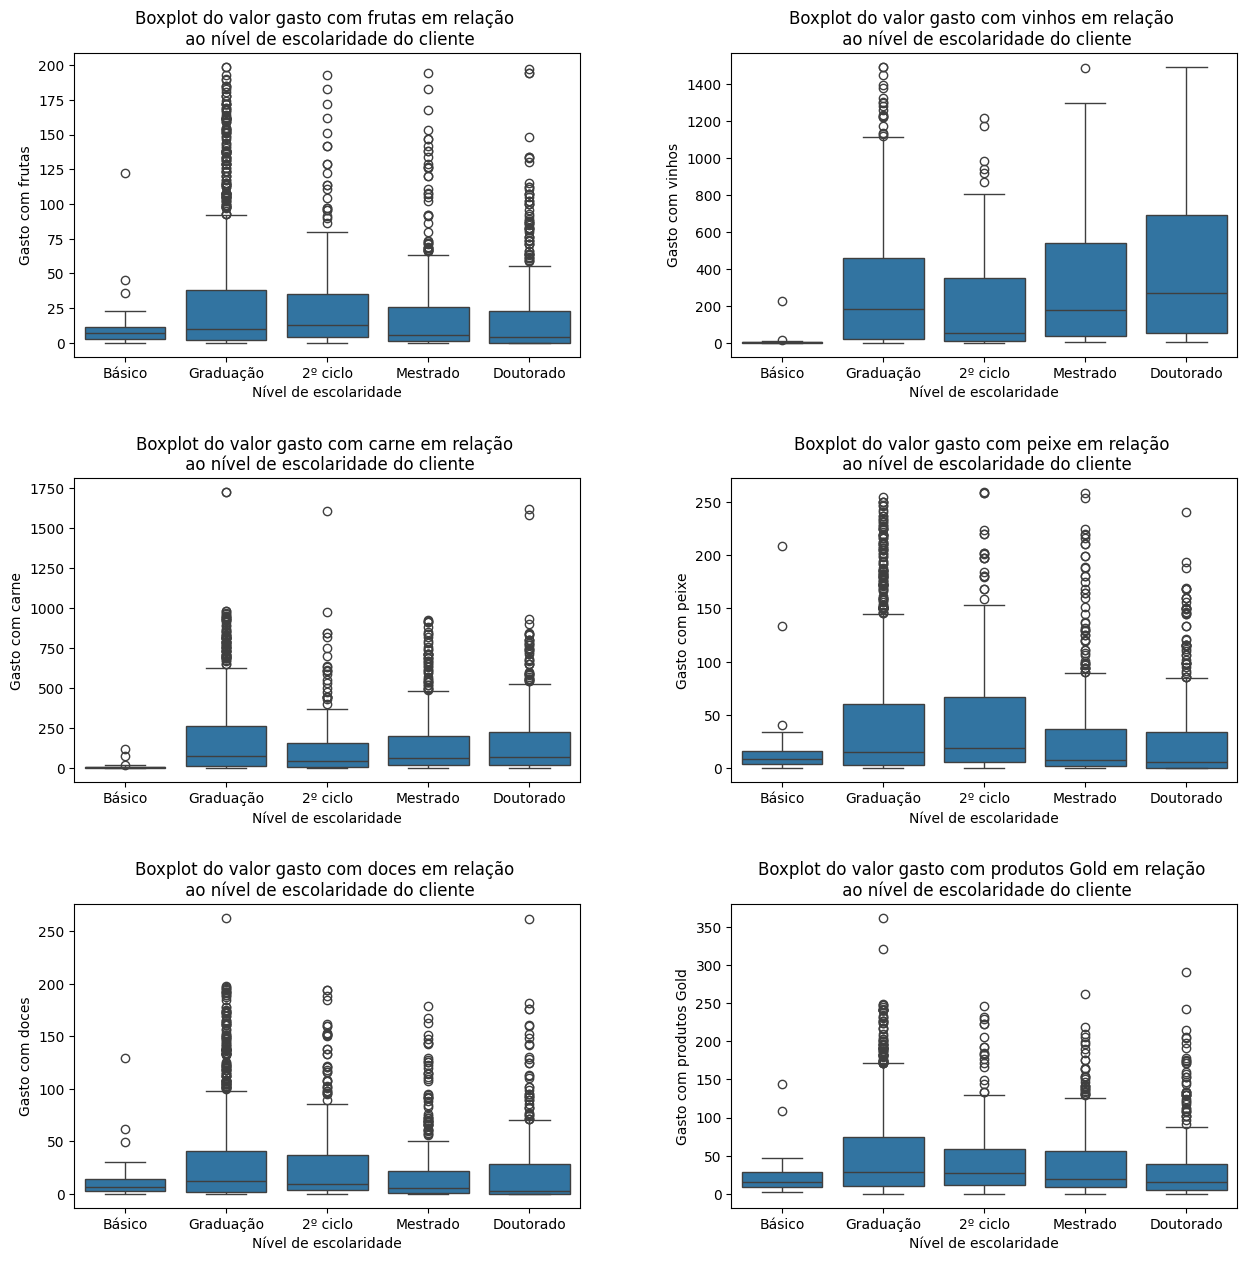

In [ ]:

# Criando a figura e os eixos
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  #2 linhas, 3 colunas
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaçamento entre os subplots

# Plotando os gráficos de caixa
sns.boxplot(data=df[['Education', 'MntFruits']], x='Education', y='MntFruits', ax=axs[0, 0])
axs[0, 0].set_title('Boxplot do valor gasto com frutas em relação \n ao nível de escolaridade do cliente')
axs[0, 0].set_xlabel('Nível de escolaridade')
axs[0, 0].set_ylabel('Gasto com frutas')
axs[0, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'MntWines']], x='Education', y='MntWines', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot do valor gasto com vinhos em relação \n ao nível de escolaridade do cliente')
axs[0, 1].set_xlabel('Nível de escolaridade')
axs[0, 1].set_ylabel('Gasto com vinhos')
axs[0, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'MntMeatProducts']], x='Education', y='MntMeatProducts', ax=axs[1, 0])
axs[1, 0].set_title('Boxplot do valor gasto com carne em relação \n ao nível de escolaridade do cliente')
axs[1, 0].set_xlabel('Nível de escolaridade')
axs[1, 0].set_ylabel('Gasto com carne')
axs[1, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'MntFishProducts']], x='Education', y='MntFishProducts', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot do valor gasto com peixe em relação \n ao nível de escolaridade do cliente')
axs[1, 1].set_xlabel('Nível de escolaridade')
axs[1, 1].set_ylabel('Gasto com peixe')
axs[1, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'MntSweetProducts']], x='Education', y='MntSweetProducts', ax=axs[2, 0])
axs[2, 0].set_title('Boxplot do valor gasto com doces em relação \n ao nível de escolaridade do cliente')
axs[2, 0].set_xlabel('Nível de escolaridade')
axs[2, 0].set_ylabel('Gasto com doces')
axs[2, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'MntGoldProds']], x='Education', y='MntGoldProds', ax=axs[2, 1])
axs[2, 1].set_title('Boxplot do valor gasto com produtos Gold em relação \n ao nível de escolaridade do cliente')
axs[2, 1].set_xlabel('Nível de escolaridade')
axs[2, 1].set_ylabel('Gasto com produtos Gold')
axs[2, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])


plt.show()

<ipython-input-355-056856cf3e84>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-355-056856cf3e84>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-355-056856cf3e84>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-355-056856cf3e84>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-355-056856cf3e84>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divo

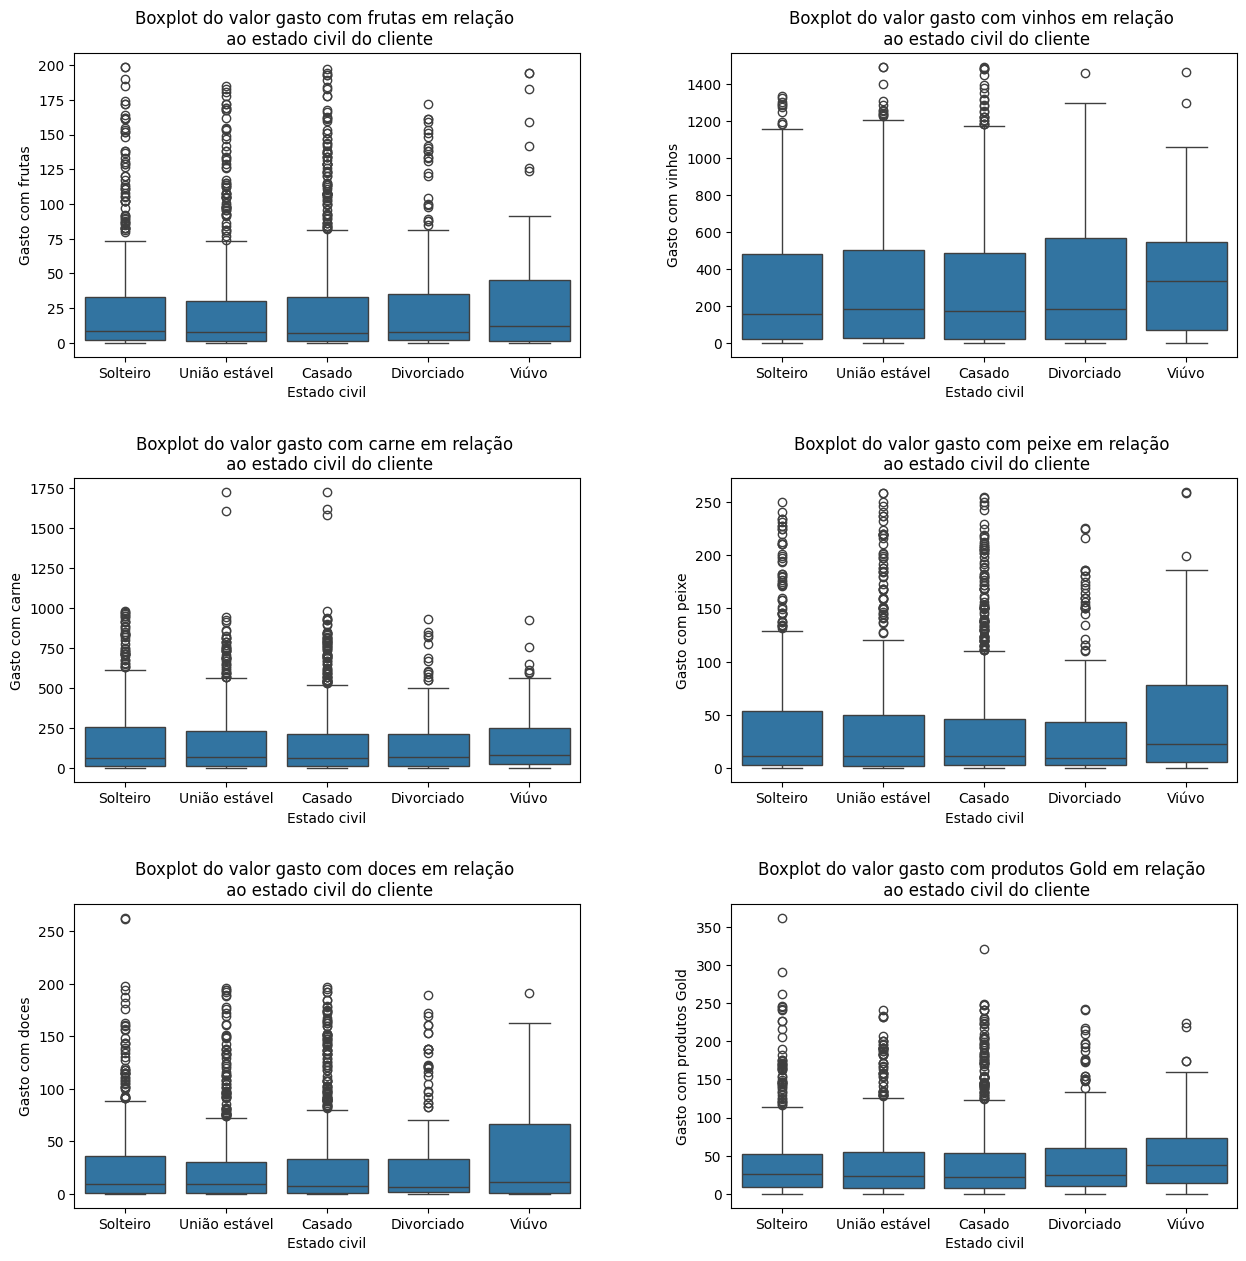

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  #2 linhas, 3 colunas
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaçamento entre os subplots

# Plotando os gráficos de caixa
sns.boxplot(data=df[['Marital_Status', 'MntFruits']], x='Marital_Status', y='MntFruits', ax=axs[0, 0])
axs[0, 0].set_title('Boxplot do valor gasto com frutas em relação \n ao estado civil do cliente')
axs[0, 0].set_xlabel('Estado civil')
axs[0, 0].set_ylabel('Gasto com frutas')
axs[0, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'MntWines']], x='Marital_Status', y='MntWines', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot do valor gasto com vinhos em relação \n ao estado civil do cliente')
axs[0, 1].set_xlabel('Estado civil')
axs[0, 1].set_ylabel('Gasto com vinhos')
axs[0, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'MntMeatProducts']], x='Marital_Status', y='MntMeatProducts', ax=axs[1, 0])
axs[1, 0].set_title('Boxplot do valor gasto com carne em relação \n ao estado civil do cliente')
axs[1, 0].set_xlabel('Estado civil')
axs[1, 0].set_ylabel('Gasto com carne')
axs[1, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'MntFishProducts']], x='Marital_Status', y='MntFishProducts', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot do valor gasto com peixe em relação \n ao estado civil do cliente')
axs[1, 1].set_xlabel('Estado civil')
axs[1, 1].set_ylabel('Gasto com peixe')
axs[1, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'MntSweetProducts']], x='Marital_Status', y='MntSweetProducts', ax=axs[2, 0])
axs[2, 0].set_title('Boxplot do valor gasto com doces em relação \n ao estado civil do cliente')
axs[2, 0].set_xlabel('Estado civil')
axs[2, 0].set_ylabel('Gasto com doces')
axs[2, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'MntGoldProds']], x='Marital_Status', y='MntGoldProds', ax=axs[2, 1])
axs[2, 1].set_title('Boxplot do valor gasto com produtos Gold em relação \n ao estado civil do cliente')
axs[2, 1].set_xlabel('Estado civil')
axs[2, 1].set_ylabel('Gasto com produtos Gold')
axs[2, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

plt.show()


<ipython-input-356-f09a3777e552>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-356-f09a3777e552>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-356-f09a3777e552>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-356-f09a3777e552>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])
<ipython-input-356-f09a3777e552>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Dou

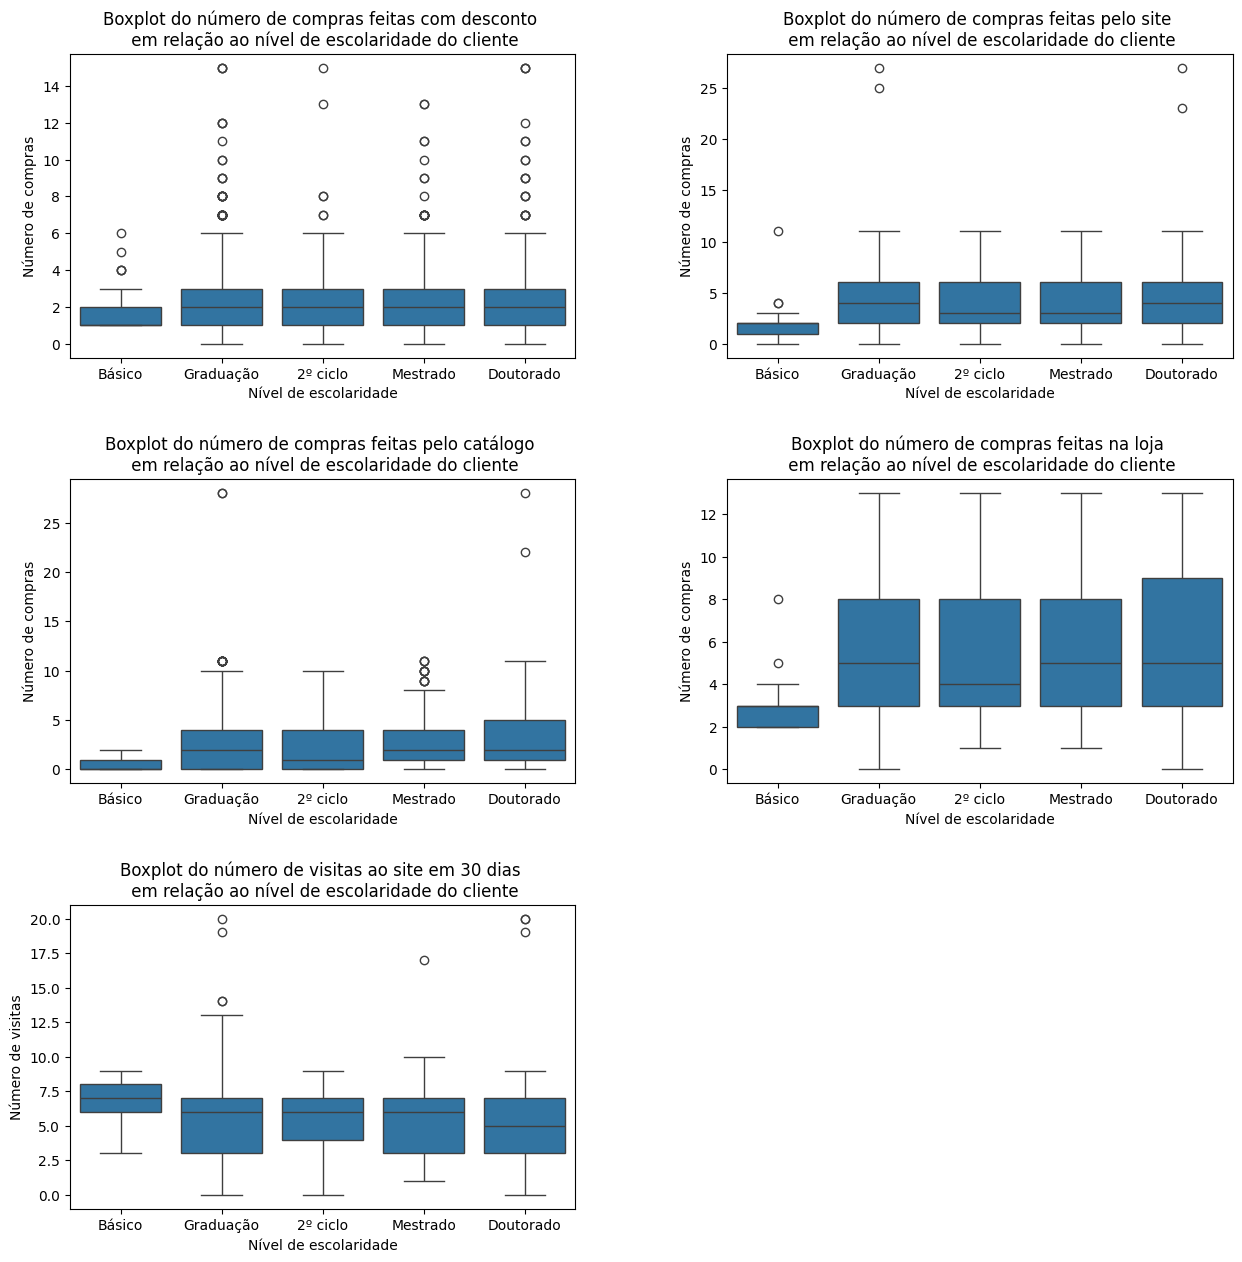

In [ ]:

# Criando a figura e os eixos
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3 linhas, 2 colunas
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaçamento entre os subplots

# Plotando os gráficos de caixa
sns.boxplot(data=df[['Education', 'NumDealsPurchases']], x='Education', y='NumDealsPurchases', ax=axs[0, 0])
axs[0, 0].set_title('Boxplot do número de compras feitas com desconto \n em relação ao nível de escolaridade do cliente')
axs[0, 0].set_xlabel('Nível de escolaridade')
axs[0, 0].set_ylabel('Número de compras')
axs[0, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'NumWebPurchases']], x='Education', y='NumWebPurchases', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot do número de compras feitas pelo site \n em relação ao nível de escolaridade do cliente')
axs[0, 1].set_xlabel('Nível de escolaridade')
axs[0, 1].set_ylabel('Número de compras')
axs[0, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'NumCatalogPurchases']], x='Education', y='NumCatalogPurchases', ax=axs[1, 0])
axs[1, 0].set_title('Boxplot do número de compras feitas pelo catálogo \n em relação ao nível de escolaridade do cliente')
axs[1, 0].set_xlabel('Nível de escolaridade')
axs[1, 0].set_ylabel('Número de compras')
axs[1, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'NumStorePurchases']], x='Education', y='NumStorePurchases', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot do número de compras feitas na loja \n em relação ao nível de escolaridade do cliente')
axs[1, 1].set_xlabel('Nível de escolaridade')
axs[1, 1].set_ylabel('Número de compras')
axs[1, 1].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

sns.boxplot(data=df[['Education', 'NumWebVisitsMonth']], x='Education', y='NumWebVisitsMonth', ax=axs[2, 0])
axs[2, 0].set_title('Boxplot do número de visitas ao site em 30 dias \n em relação ao nível de escolaridade do cliente')
axs[2, 0].set_xlabel('Nível de escolaridade')
axs[2, 0].set_ylabel('Número de visitas')
axs[2, 0].set_xticklabels(['Básico', 'Graduação', '2º ciclo', 'Mestrado', 'Doutorado'])

# Removendo o último eixo vazio (opcional)
fig.delaxes(axs[2, 1])

# Exibindo a figura
plt.show()


<ipython-input-357-22aa4ee31678>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-357-22aa4ee31678>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-357-22aa4ee31678>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-357-22aa4ee31678>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])
<ipython-input-357-22aa4ee31678>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Div

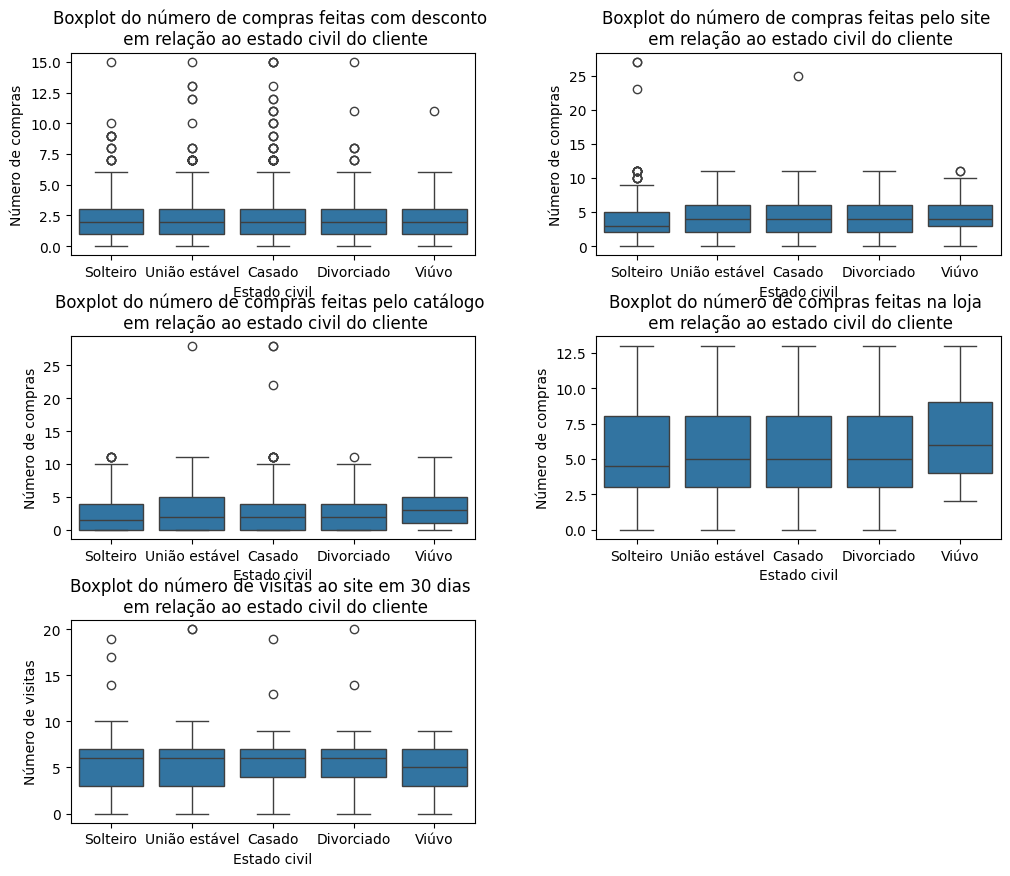

In [ ]:
# Criando a figura e os eixos
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # 3 linhas, 2 colunas
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaçamento entre os subplots

# Plotando os gráficos de caixa
sns.boxplot(data=df[['Marital_Status', 'NumDealsPurchases']], x='Marital_Status', y='NumDealsPurchases', ax=axs[0, 0])
axs[0, 0].set_title('Boxplot do número de compras feitas com desconto \n em relação ao estado civil do cliente')
axs[0, 0].set_xlabel('Estado civil')
axs[0, 0].set_ylabel('Número de compras')
axs[0, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'NumWebPurchases']], x='Marital_Status', y='NumWebPurchases', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot do número de compras feitas pelo site \n em relação ao estado civil do cliente')
axs[0, 1].set_xlabel('Estado civil')
axs[0, 1].set_ylabel('Número de compras')
axs[0, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'NumCatalogPurchases']], x='Marital_Status', y='NumCatalogPurchases', ax=axs[1, 0])
axs[1, 0].set_title('Boxplot do número de compras feitas pelo catálogo \n em relação ao estado civil do cliente')
axs[1, 0].set_xlabel('Estado civil')
axs[1, 0].set_ylabel('Número de compras')
axs[1, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'NumStorePurchases']], x='Marital_Status', y='NumStorePurchases', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot do número de compras feitas na loja \n em relação ao estado civil do cliente')
axs[1, 1].set_xlabel('Estado civil')
axs[1, 1].set_ylabel('Número de compras')
axs[1, 1].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

sns.boxplot(data=df[['Marital_Status', 'NumWebVisitsMonth']], x='Marital_Status', y='NumWebVisitsMonth', ax=axs[2, 0])
axs[2, 0].set_title('Boxplot do número de visitas ao site em 30 dias \n em relação ao estado civil do cliente')
axs[2, 0].set_xlabel('Estado civil')
axs[2, 0].set_ylabel('Número de visitas')
axs[2, 0].set_xticklabels(['Solteiro', 'União estável', 'Casado', 'Divorciado', 'Viúvo'])

# Removendo o último eixo vazio (opcional)
fig.delaxes(axs[2, 1])

# Exibindo a figura
plt.show()


# Fazendo a seleção de colunas

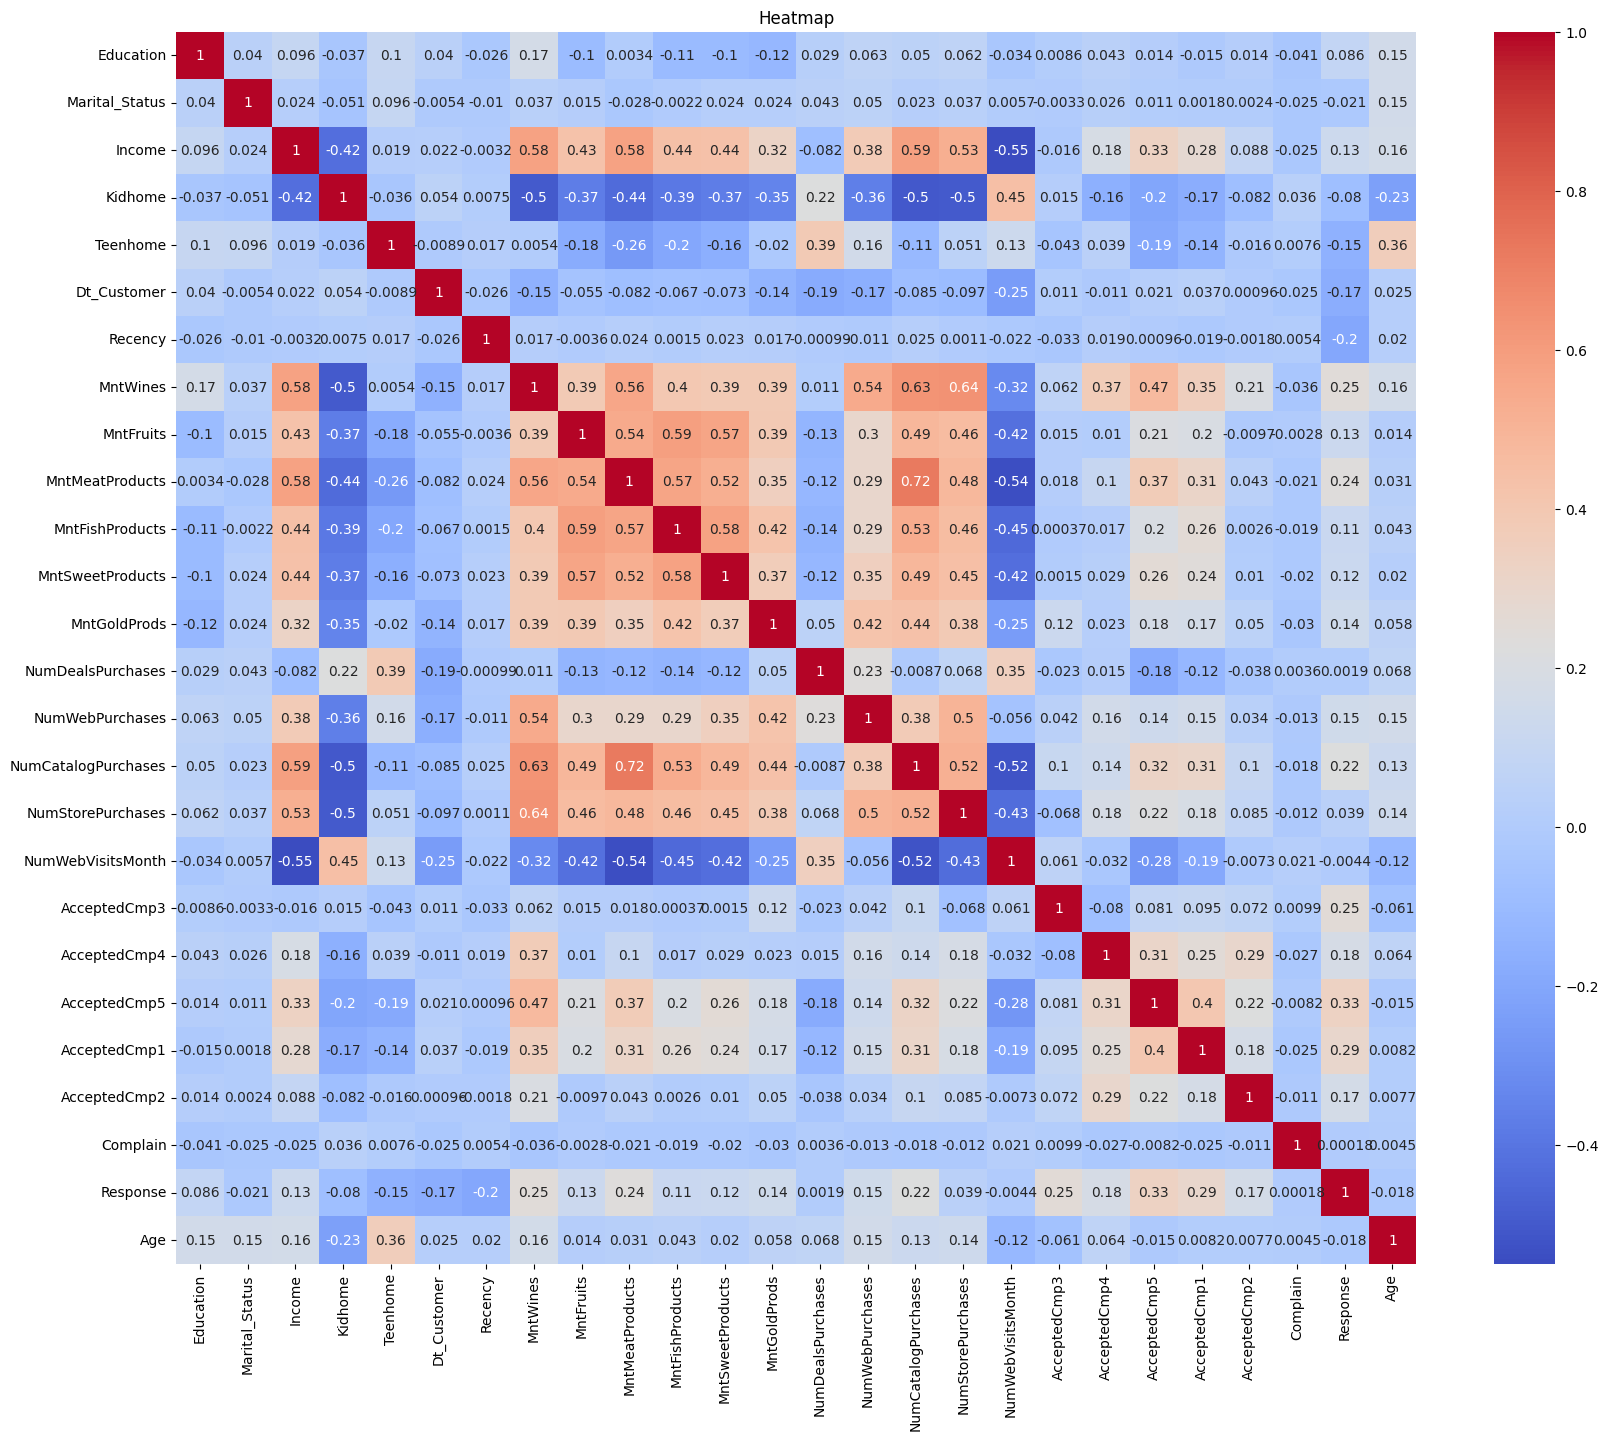

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2237 non-null   int64  
 1   Marital_Status       2237 non-null   int64  
 2   Income               2237 non-null   float64
 3   Kidhome              2237 non-null   int64  
 4   Teenhome             2237 non-null   int64  
 5   Dt_Customer          2237 non-null   int64  
 6   Recency              2237 non-null   int64  
 7   MntWines             2237 non-null   int64  
 8   MntFruits            2237 non-null   int64  
 9   MntMeatProducts      2237 non-null   int64  
 10  MntFishProducts      2237 non-null   int64  
 11  MntSweetProducts     2237 non-null   int64  
 12  MntGoldProds         2237 non-null   int64  
 13  NumDealsPurchases    2237 non-null   int64  
 14  NumWebPurchases      2237 non-null   int64  
 15  NumCatalogPurchases  2237 non-null   int64 

In [ ]:
df['Childrens'] = df['Kidhome'] + df['Teenhome']

df = df.drop(['Kidhome', 'Teenhome'], axis=1)

In [ ]:
df_marketing = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

In [ ]:
df['Marketing'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

In [ ]:
df_original = df.copy(deep=True)

In [ ]:
df = df.drop(['Complain'], axis=1)
df = df.drop(['Marital_Status'], axis=1)
df = df.drop(['Recency'], axis=1)
df = df.drop(['Education'], axis=1)

Tiramos todos esses atributos por vermos com base no gráfico que eles tem pouca correlação com outros atributos, então não agregando tanta informação valiosa assim.

Parece estranho, mas uma de nossas teorias é que outros atributos já emitem indiretamente ou diretamente informações que esses que excluiamos emitiam.

## Normalização

Normalização é uma importante etapa no processo para diminuirmos o tamanho dos valores do conjunto sem perder a informação que elas traziam anteriormente. Por exemplo, em 'Income' há várias clientes com rendas muito altas, que podem puxar os algoritmos à inviesamento que a renda média dos clientes é mais alta do que o normal.

In [ ]:
columns_normalize = list(df.columns.values)

scaler = MinMaxScaler()
df[columns_normalize] = scaler.fit_transform(df[columns_normalize])
df


,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Childrens,Marketing
0,0.084832,0.0,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,1.0,0.696429,0.000000,0.00
1,0.067095,1.0,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.750000,0.666667,0.00
2,0.105097,0.5,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.553571,0.000000,0.00
3,0.037471,1.0,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.214286,0.333333,0.00
4,0.085065,1.0,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.267857,0.333333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.5,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0.0,0.517857,0.333333,0.00
2236,0.093669,1.0,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.892857,1.000000,0.25
2237,0.083092,1.0,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0.0,0.267857,0.000000,0.25
2238,0.101536,1.0,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0.0,0.714286,0.333333,0.00


#PCA

O método de PCA reduz a dimensionalidade de um conjunto de dados sempre minimizando o máximo de perda de informação (variância) possível.

No gráfico abaixo vemos que se reduzirmos nosso conjunto de 16 para 13 atributos, não perdemos nem 95% de informação.

Usamos esse método para reduzir um pouco a dimensionalidade para melhorar a eficiência de nossos futuros algoritmos de Clusters

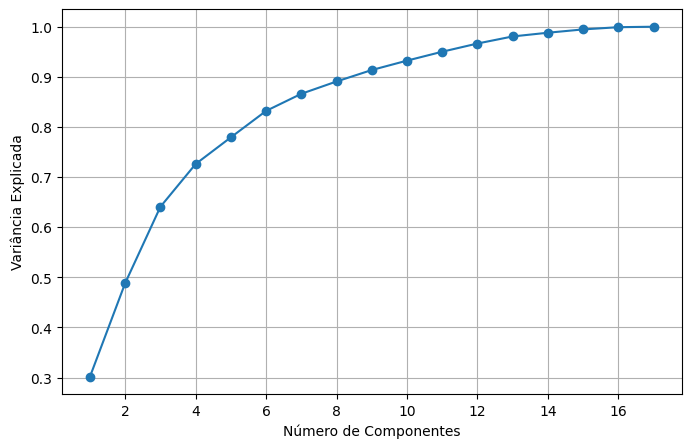

In [ ]:
pca = PCA().fit(df)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada')
# plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.savefig("pca")
plt.show()

In [ ]:
print(pca.explained_variance_ratio_.cumsum())

[0.30163367 0.48843733 0.64075647 0.7260494  0.77929643 0.83202779
 0.86618325 0.89074742 0.91359363 0.9323424  0.95012069 0.96649028
 0.98060805 0.98802774 0.99463516 0.99907203 1.        ]


In [ ]:
# para manter uma variancia maior que 90% e considerando os retornos decrescentes, creio que pca com 13 componentes eh uma boa
pca = PCA(n_components=10)
df = pca.fit_transform(df)

# Aplicando Algoritmos de Clusters

Para este trabalho, usaremos dois algoritmos de Cluster: **HDBSCAN** e **K-Means**. Os dois constroem os clusters de formas diferentes, o primeiro por densidade e hierarquia e o segundo por cálculo de centróides.

## HDBSCAN

Como nosso conjunto de dados é pequeno, podemos rodar algumas vezes esse algoritmo (que comparado ao K-Means demanda mais recursos computacionais). Assim, achamos qual é a melhor maneira, comparando em cada iteração pela medida de DBCV, que cálcula a qualidade dos clusters formados pelo algoritmo.

In [ ]:
def evaluate_hdbscan(X, min_cluster_sizes, min_samples_list):
    best_dbcv_score = -1
    best_params = None
    best_model = None

    for min_cluster_size in min_cluster_sizes:
        for min_samples in min_samples_list:

            model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
            labels = model.fit_predict(X)

            filtered_labels = labels[labels != -1]
            filtered_X = X[labels != -1]
            outliers = X[labels == -1]

            if len(set(filtered_labels)) <= 1:
                continue


            # Cálculo DBCV
            score = dbcv(filtered_X, filtered_labels)

            print(f"min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, DBCV: {score:.4f},  num_of_clusters: {len(np.unique(labels))}, outliers: {len(outliers)}")

            # Checando qual melhor score de DBCV
            if score > best_dbcv_score:
                best_dbcv_score = score
                best_params = (min_cluster_size, min_samples)
                best_model = model

    print(f"\nBest DBCV Score: {best_dbcv_score:.4f}, best_params = {best_params}")

    return best_model, best_params, best_dbcv_score



In [ ]:
min_cluster_sizes = [5,10,15,20]
min_samples_list = [1,5,10,15,20]

best_model, best_params, best_dbcv_score = evaluate_hdbscan(df, min_cluster_sizes, min_samples_list)

min_cluster_size: 5, min_samples: 1, DBCV: 0.0653,  num_of_clusters: 85, outliers: 825
min_cluster_size: 5, min_samples: 5, DBCV: 0.0737,  num_of_clusters: 22, outliers: 795
min_cluster_size: 5, min_samples: 10, DBCV: 0.0405,  num_of_clusters: 13, outliers: 809
min_cluster_size: 5, min_samples: 15, DBCV: 0.1202,  num_of_clusters: 10, outliers: 923
min_cluster_size: 5, min_samples: 20, DBCV: 0.1558,  num_of_clusters: 8, outliers: 875
min_cluster_size: 10, min_samples: 1, DBCV: 0.0053,  num_of_clusters: 28, outliers: 638
min_cluster_size: 10, min_samples: 5, DBCV: 0.0512,  num_of_clusters: 16, outliers: 732
min_cluster_size: 10, min_samples: 10, DBCV: 0.0239,  num_of_clusters: 11, outliers: 816
min_cluster_size: 10, min_samples: 15, DBCV: 0.1202,  num_of_clusters: 10, outliers: 923
min_cluster_size: 10, min_samples: 20, DBCV: 0.1558,  num_of_clusters: 8, outliers: 875
min_cluster_size: 15, min_samples: 1, DBCV: -0.0353,  num_of_clusters: 21, outliers: 825
min_cluster_size: 15, min_sample

No código abaixo, mostramos quais melhores parametros para usar no HDBSCAN* por meio da medida de DBCV

In [ ]:
print(best_model, best_params, best_dbcv_score)

HDBSCAN(min_samples=20) (5, 20) 0.15584256095843313


In [ ]:
# Clusters feitos!
hdbmodel = hdbscan.HDBSCAN(min_cluster_size = 5, min_samples = 15)
hdb = hdbmodel.fit(df)

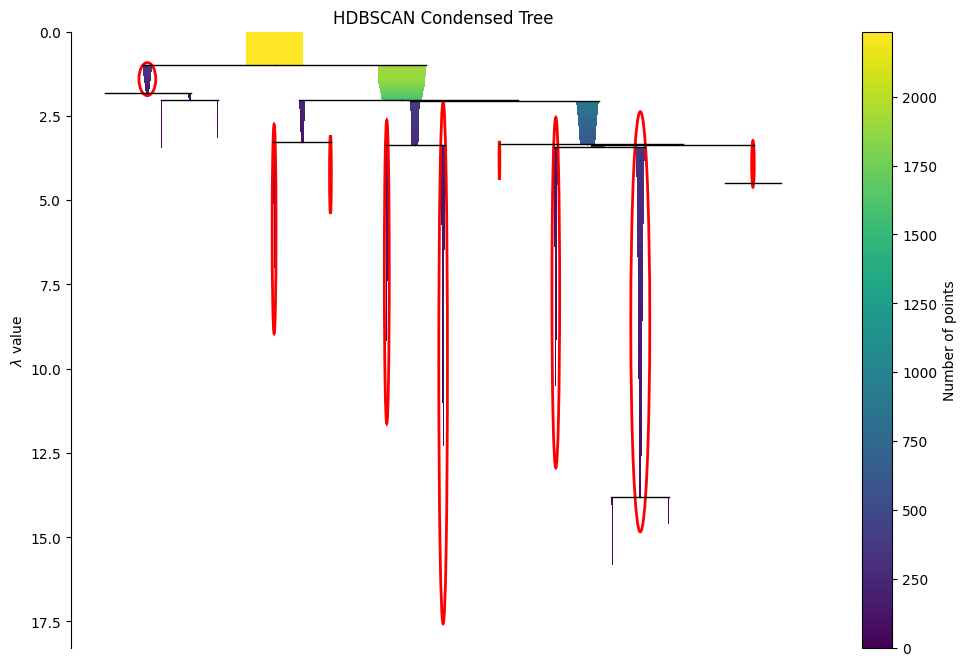

In [ ]:
plt.figure(figsize=(12, 8))
hdb.condensed_tree_.plot(select_clusters=True)
# hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.title('HDBSCAN Condensed Tree')
plt.show()

In [ ]:
df_original['cluster_hdbscan'] = hdb.labels_


In [ ]:
cluster_description = df_original.groupby('cluster_hdbscan').describe()
cluster_description


Education                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster_hdbscan                                                          
-1                  923.0  1.989166  1.247075  0.0  1.0  1.0  3.0  4.0   
 0                  334.0  2.308383  1.330218  0.0  1.0  2.0  4.0  4.0   
 1                   98.0  2.357143  1.310151  1.0  1.0  2.0  4.0  4.0   
 2                  172.0  2.133721  1.328774  0.0  1.0  1.0  4.0  4.0   
 3                   77.0  1.493506  1.242063  0.0  1.0  1.0  2.0  4.0   
 4                   36.0  1.916667  1.273353  1.0  1.0  1.0  3.0  4.0   
 5                   15.0  2.400000  1.404076  1.0  1.0  3.0  4.0  4.0   
 6                   51.0  1.627451  1.182553  0.0  1.0  1.0  2.5  4.0   
 7                  154.0  2.058442  1.216644  0.0  1.0  1.5  3.0  4.0   
 8                  377.0  2.000000  1.248403  0.0  1.0  1.0  3.0  4.0   

                Marital_Status                                               \
                         count      mean       std  min  25%  50%  75%  max   
cluster_hdbscan                                                               
-1                       923.0  1.501625  1.005812  0.0  1.0  2.0  2.0  4.0   
 0                       334.0  1.425150  1.237100  0.0  0.0  1.0  2.0  4.0   
 1                        98.0  1.581633  0.994039  0.0  1.0  2.0  2.0  4.0   
 2                       172.0  1.395349  1.006169  0.0  1.0  1.0  2.0  4.0   
 3                        77.0  1.402597  1.029304  0.0  1.0  1.0  2.0  4.0   
 4                        36.0  1.555556  1.106976  0.0  1.0  1.5  2.0  4.0   
 5                        15.0  1.400000  1.183216  0.0  0.0  2.0  2.0  3.0   
 6                        51.0  1.411765  0.941838  0.0  1.0  2.0  2.0  3.0   
 7                       154.0  1.590909  1.076266  0.0  1.0  2.0  2.0  4.0   
 8                       377.0  1.456233  0.994035  0.0  1.0  2.0  2.0  4.0   

                Income                                                 \
                 count          mean           std      min       25%   
cluster_hdbscan                                                         
-1               923.0  63554.700975  18200.371831   1730.0  54723.00   
 0               334.0  60183.244012  23164.266112   7500.0  39786.75   
 1                98.0  39507.489796  10598.781550  16626.0  32226.50   
 2               172.0  40134.654070  14310.552764  10404.0  30021.00   
 3                77.0  29191.071429  10617.397787   7500.0  23331.00   
 4                36.0  39279.152778  10727.544981   7500.0  34859.75   
 5                15.0  36562.466667  10217.206271  22574.0  28869.00   
 6                51.0  26608.519608  10859.370576   7500.0  18759.00   
 7               154.0  41758.496753  15433.547289   8820.0  33473.75   
 8               377.0  40577.140584  35850.423628   3502.0  28164.00   

                                             Dt_Customer                      \
                     50%       75%       max       count      mean       std   
cluster_hdbscan                                                                
-1               65665.0  75073.00  160803.0       923.0  1.988082  0.726676   
 0               64044.0  80477.00  105471.0       334.0  1.748503  0.690724   
 1               38797.0  46284.50   65808.0        98.0  3.000000  0.000000   
 2               37697.0  51843.00   71322.0       172.0  3.000000  0.000000   
 3               29760.0  35797.00   52117.0        77.0  1.000000  0.000000   
 4               38599.0  45247.50   60544.0        36.0  1.000000  0.000000   
 5               35791.0  40768.50   59062.0        15.0  2.000000  0.000000   
 6               23272.0  34465.50   51381.5        51.0  2.000000  0.000000   
 7               41501.5  49665.25  162397.0       154.0  2.000000  0.000000   
 8               38361.0  48726.00  666666.0       377.0  2.000000  0.000000   

                                  

O algoritmo apresentou um grande número de clusters. O problema que podemos visualizar é que 700 de 2000 objetos foram considerados outliers. Isso quer dizer que eles não foram adicionados em nenhum conjunto (a não ser, claro, aos dos outliers, que não apresentam um padrão), o que limita nosso entendimento sobre os reais grupos com os clientes.

Atrelado a isso, o melhor DBCV que consiguimos foi 0,3 (sendo o melhor resultado 1), o que não é tão bom assim. Por isso, optamos por descartar a analise nesse algoritmo, entendendo que ela não será tão boa assim.

## K-Means

Primeiramente, para usar o K-Means, vamos rodá-lo com alguns números para K e ver a medida de Silhueta e o J. O K que nos der o melhor resultado nós escolheremos para usar

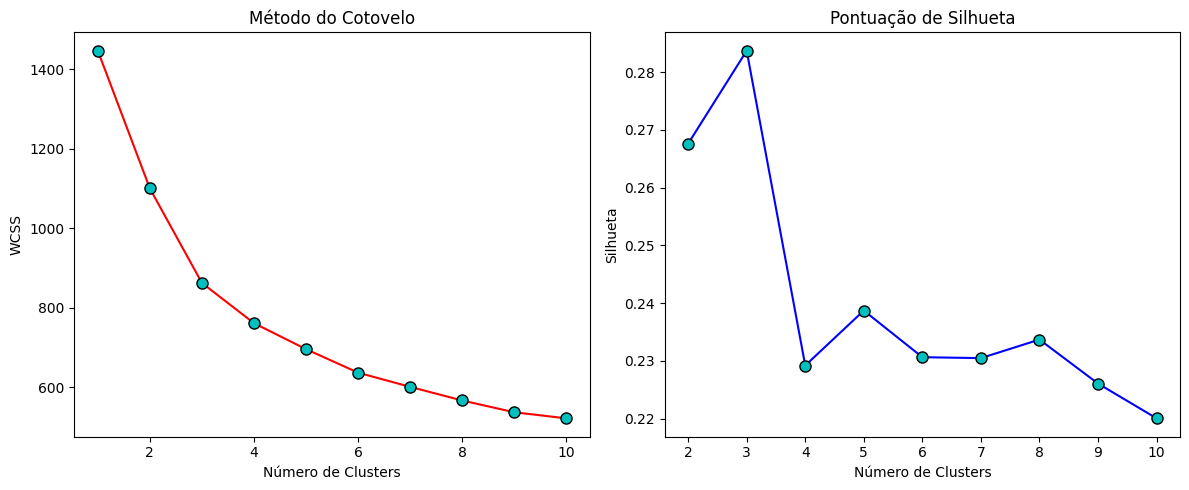

In [ ]:
clusters = []
wcss = []
silhuetas = []

# Loop para testar diferentes números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=15, init='k-means++', random_state=42)
    clusters_kmeans = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Calcular silhueta apenas para i >= 2
        silhueta = silhouette_score(df, clusters_kmeans)
        silhuetas.append(silhueta)

# Plotar o método do cotovelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', ms=8, mec='k', mfc='c', color='red')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# Plotar pontuações de silhueta
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhuetas, marker='o', ms=8, mec='k', mfc='c', color='blue')
plt.title('Pontuação de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhueta')

plt.savefig("elbow_silhouette_kmeans")

plt.tight_layout()
plt.show()

Sabemos que quanto menor o WCSS, mais semelhantes os clusters serão. Porém, há uma pegadinha, o número de clusters aumentando obviamente vai diminuir o WCSS, então ele não é uma boa métrica para se analisar sozinho.

Por isso fizemos um gráfico com a medida de silhueta para ver qual K é melhor (quanto mais próximo de 1, melhor os cluster são por essa medida).

Olhando para os dois gráficos, visualizamos que K = 3 é a melhor escolha. 4 também não seria uma escolha ruim, porém optamos pelo número 3.

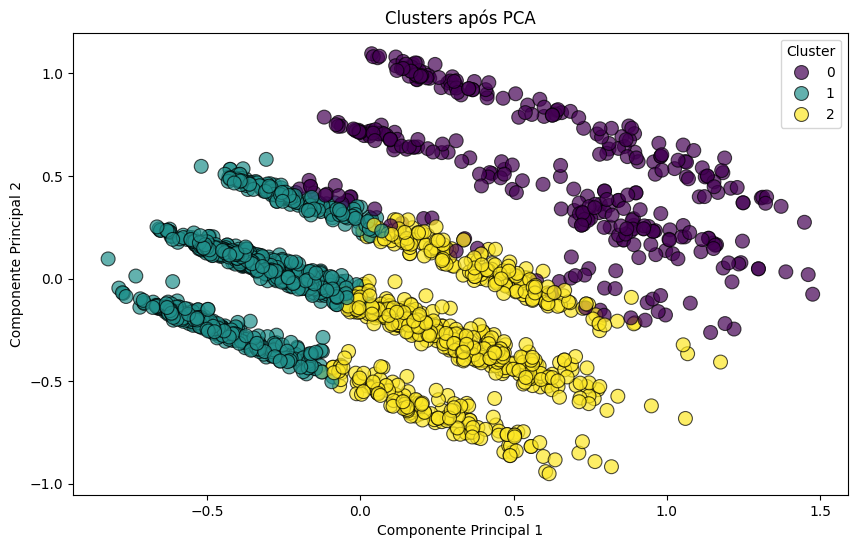

'\nREPRESENTAÇÃO MERAMENTE VISUAL, NÃO AGREGA INFORMAÇÃO DE FATO PARA A ANÁLISE!\n'

In [ ]:
k = 3
kmeans_5 = KMeans(n_clusters= k, n_init = 15, random_state=42)

clusters_kmeans = kmeans_5.fit_predict(df) # formação dos clusters

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Criar um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

df_pca['cluster'] = clusters_kmeans

# Criar scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, edgecolor='k', alpha=0.7)

# Adicionar título e rótulos
plt.title('Clusters após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

'''
REPRESENTAÇÃO MERAMENTE VISUAL, NÃO AGREGA INFORMAÇÃO DE FATO PARA A ANÁLISE!
'''

### validação kmeans

Área reservada para colocar duas métricas de validação por silhueta e Davies Budini. É preciso perceber que as métricas não estão tão boas, porém foram as melhores que conseguimos por análises acima.

In [ ]:
silhouette_avg = silhouette_score(df, clusters_kmeans)
print(f'SS: {silhouette_avg}')

davies_bouldin = davies_bouldin_score(df, clusters_kmeans)
print(f'DBI: {davies_bouldin}')

SS: 0.283730188918562
DBI: 1.44987363115938


### Análise Clusters K-Means

Seção dedicada para analisar os 3 diferentes grupos que achamos de clientes

In [ ]:
df_original['Cluster_KMeans'] = clusters_kmeans

cluster_description = df_original.groupby('Cluster_KMeans').describe()
cluster_description

Education                                               \
                   count      mean       std  min  25%  50%  75%  max   
Cluster_KMeans                                                          
0                  334.0  2.308383  1.330218  0.0  1.0  2.0  4.0  4.0   
1                 1179.0  1.994911  1.273995  0.0  1.0  1.0  3.0  4.0   
2                  724.0  2.011050  1.244580  0.0  1.0  1.0  3.0  4.0   

               Marital_Status                                               \
                        count      mean       std  min  25%  50%  75%  max   
Cluster_KMeans                                                               
0                       334.0  1.425150  1.237100  0.0  0.0  1.0  2.0  4.0   
1                      1179.0  1.473282  1.004197  0.0  1.0  2.0  2.0  4.0   
2                       724.0  1.512431  1.021815  0.0  1.0  2.0  2.0  4.0   

                Income                                                 \
                 count          mean           std      min       25%   
Cluster_KMeans                                                          
0                334.0  60183.244012  23164.266112   7500.0  39786.75   
1               1179.0  39843.749364  24711.676706   1730.0  28449.50   
2                724.0  68723.379834  12070.250903  22507.0  61797.00   

                                           Dt_Customer                      \
                    50%      75%       max       count      mean       std   
Cluster_KMeans                                                               
0               64044.0  80477.0  105471.0       334.0  1.748503  0.690724   
1               38557.0  49462.5  666666.0      1179.0  2.143342  0.662336   
2               69153.5  76810.5  160803.0       724.0  1.968232  0.673823   

                                        Recency                             \
                min  25%  50%  75%  max   count       mean        std  min   
Cluster_KMeans                                                               
0               1.0  1.0  2.0  2.0  3.0   334.0  35.383234  27.659499  0.0   
1               1.0  2.0  2.0  3.0  3.0  1179.0  50.756573  28.649263  0.0   
2               1.0  2.0  2.0  2.0  3.0   724.0  52.744475  28.261027  0.0   

                                         MntWines                          \
                  25%   50%    75%   max    count        mean         std   
Cluster_KMeans                                                              
0               11.00  30.0  56.00  99.0    334.0  502.703593  427.183786   
1               27.00  51.0  76.00  99.0   1179.0   94.000000  134.446504   
2               28.75  56.0  77.25  99.0    724.0  554.294199  289.751724   

                                                  MntFruits             \
                min    25%    50%     75%     max     count       mean   
Cluster_KMeans                                                           
0               1.0   96.0  448.0  875.50  1492.0     334.0  38.203593   
1               0.0   10.0   30.0  126.00   856.0    1179.0   5.787956   
2               7.0  340.0  519.5  741.25  1493.0     724.0  54.120166   

                                                         MntMeatProducts  \
                      std  min   25%   50%    75%    max           count   
Cluster_KMeans                                                             
0               46.099519  0.0   4.0  21.0  53.75  193.0           334.0   
1                8.934443  0.0   0.0   3.0   7.00   70.0          1179.0   
2               47.358007  0.0  18.0  38.0  80.00  199.0           724.0   

                                                                             \
                      mean         std   min     25%    50%     75%     max   
Cluster_KMeans                                                                
0               294.353293  286.890036   1.0   47.75  174.5  509.75   981.0   
1                39.517388  103.252540   0.0    9

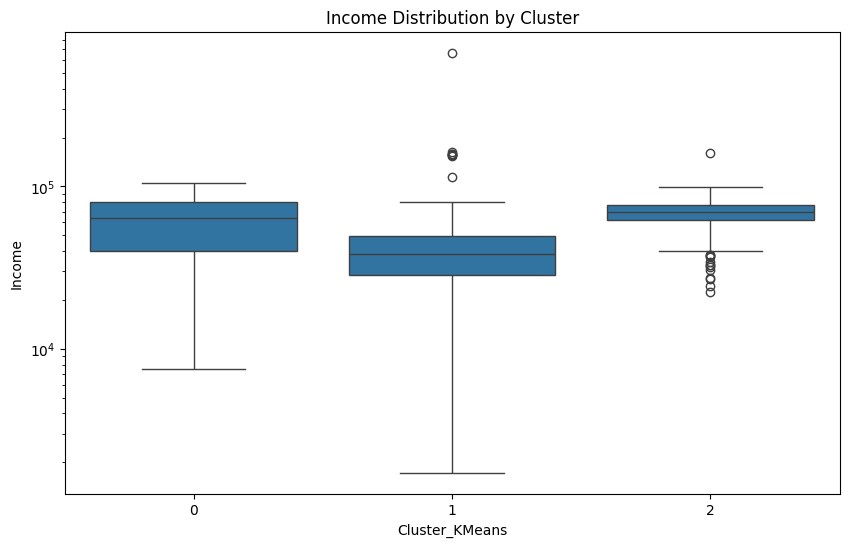

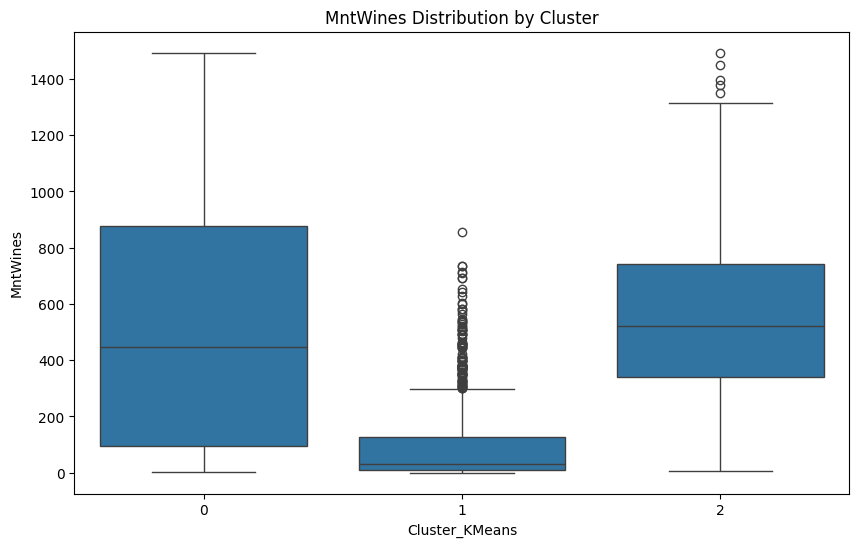

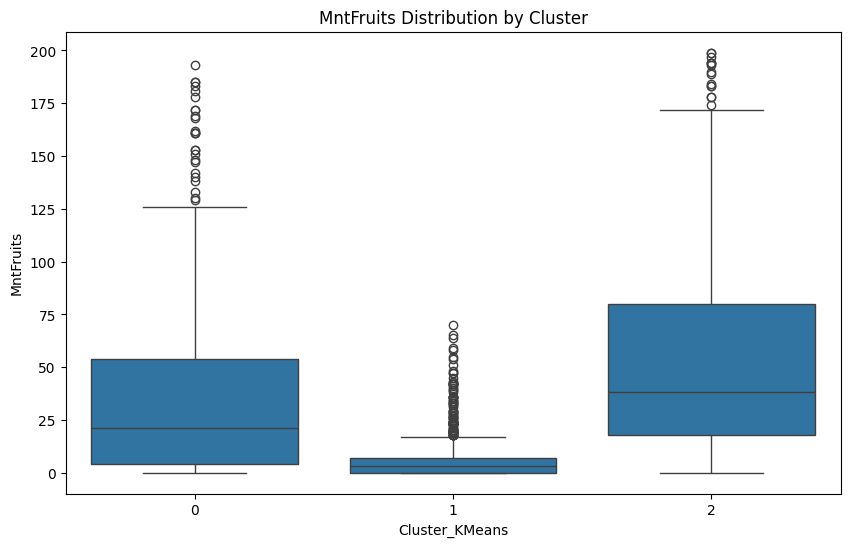

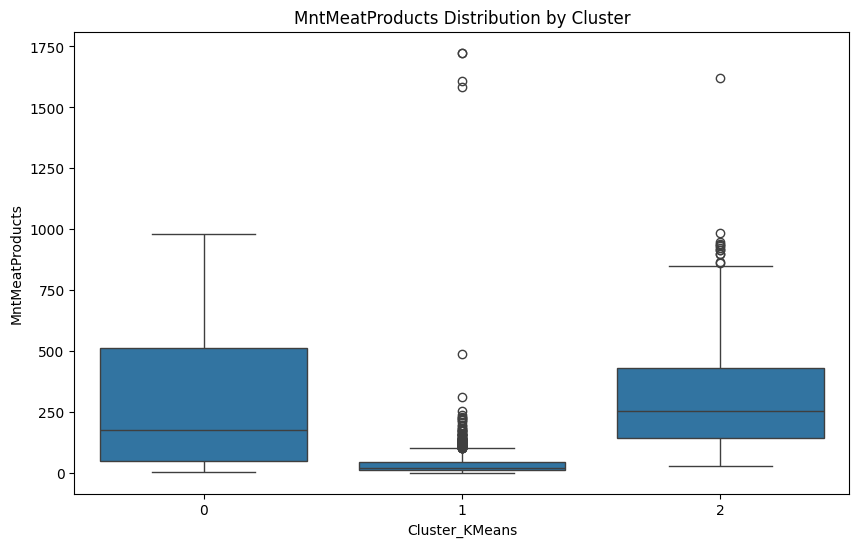

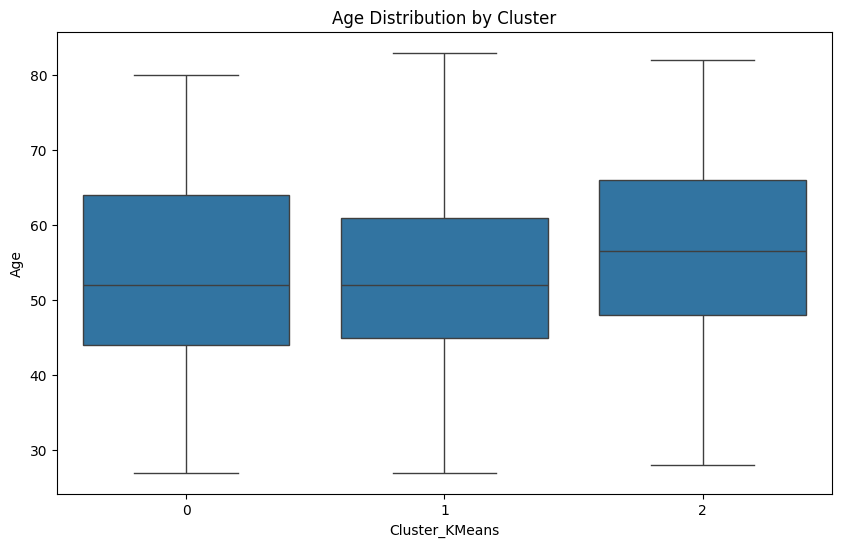

In [ ]:

features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'Age']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_KMeans', y=feature, data=df_original)
    if feature == 'Income':
      plt.yscale('log')
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()

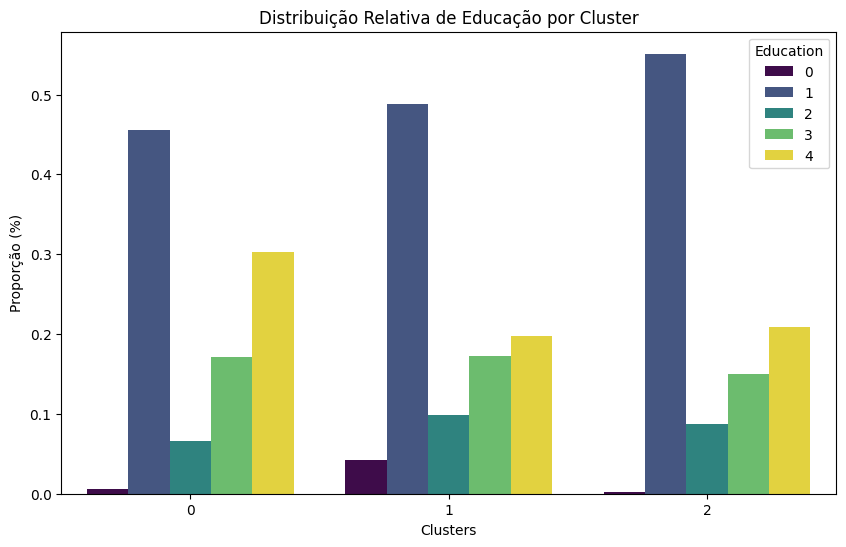

In [ ]:
cluster_counts = df_original.groupby('Cluster_KMeans')['Education'].count()

education_counts = df_original.groupby(['Cluster_KMeans', 'Education']).size().unstack(fill_value=0)

education_proportions = education_counts.div(cluster_counts, axis=0)

education_proportions_long = education_proportions.stack().reset_index(name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(data=education_proportions_long, x='Cluster_KMeans', y='Proportion', hue='Education', palette='viridis')

plt.title('Distribuição Relativa de Educação por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Proporção (%)')
plt.legend(title='Education')

plt.show()

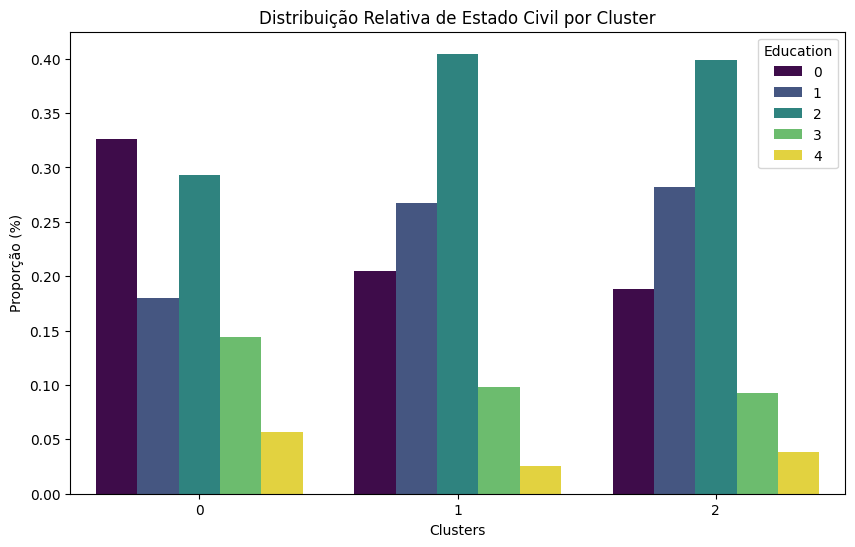

In [ ]:
cluster_counts = df_original.groupby('Cluster_KMeans')['Marital_Status'].count()

Marital_Status_counts = df_original.groupby(['Cluster_KMeans', 'Marital_Status']).size().unstack(fill_value=0)

Marital_Status_proportions = Marital_Status_counts.div(cluster_counts, axis=0)

Marital_Status_proportions_long = Marital_Status_proportions.stack().reset_index(name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(data=Marital_Status_proportions_long, x='Cluster_KMeans', y='Proportion', hue='Marital_Status', palette='viridis')

plt.title('Distribuição Relativa de Estado Civil por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Proporção (%)')
plt.legend(title='Education')

plt.show()

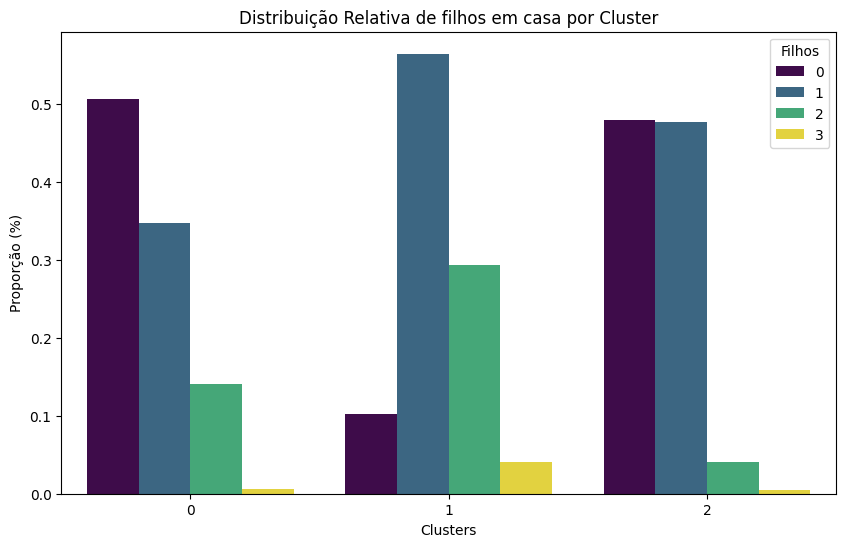

In [ ]:
cluster_counts = df_original.groupby('Cluster_KMeans')['Childrens'].count()

children_counts = df_original.groupby(['Cluster_KMeans', 'Childrens']).size().unstack(fill_value=0)

children_proportions = children_counts.div(cluster_counts, axis=0)

children_proportions_long = children_proportions.stack().reset_index(name='Proportion')

plt.figure(figsize=(10, 6))
sns.barplot(data=children_proportions_long, x='Cluster_KMeans', y='Proportion', hue='Childrens', palette='viridis')

plt.title('Distribuição Relativa de filhos em casa por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Proporção (%)')
plt.legend(title='Filhos')

plt.show()

<ipython-input-383-2f3ddb2d8603>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KMeans', y=attribute, data=df_original, palette='Set2')
<ipython-input-383-2f3ddb2d8603>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KMeans', y=attribute, data=df_original, palette='Set2')
<ipython-input-383-2f3ddb2d8603>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KMeans', y=attribute, data=df_original, palette='Set2')
<ipython-input-383-2f3ddb2d8603>:11: FutureWarning: 

Passing `palette` without assigning `hue` i

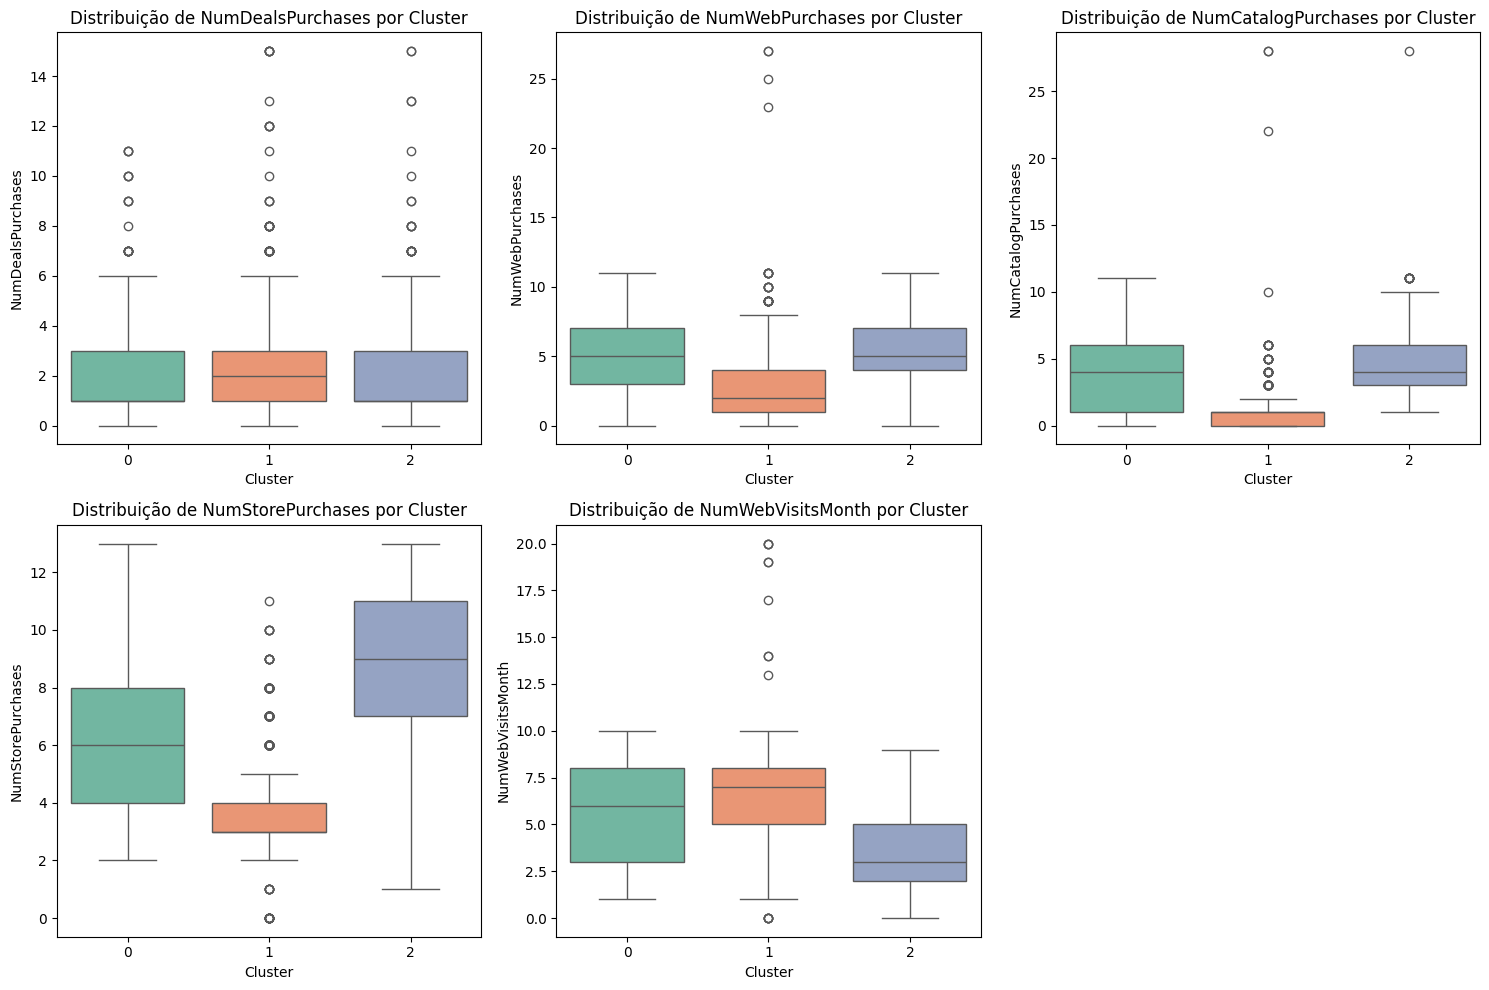

In [ ]:
attributes = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
              'NumStorePurchases', 'NumWebVisitsMonth']
# Lista dos atributos relacionados às compras e visitas
attributes = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
              'NumStorePurchases', 'NumWebVisitsMonth']

# Criar um subplot para cada atributo
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster_KMeans', y=attribute, data=df_original, palette='Set2')
    plt.title(f'Distribuição de {attribute} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()



In [ ]:
df_original = pd.concat([df_original, df_marketing], axis=1)
df_original.head(3)

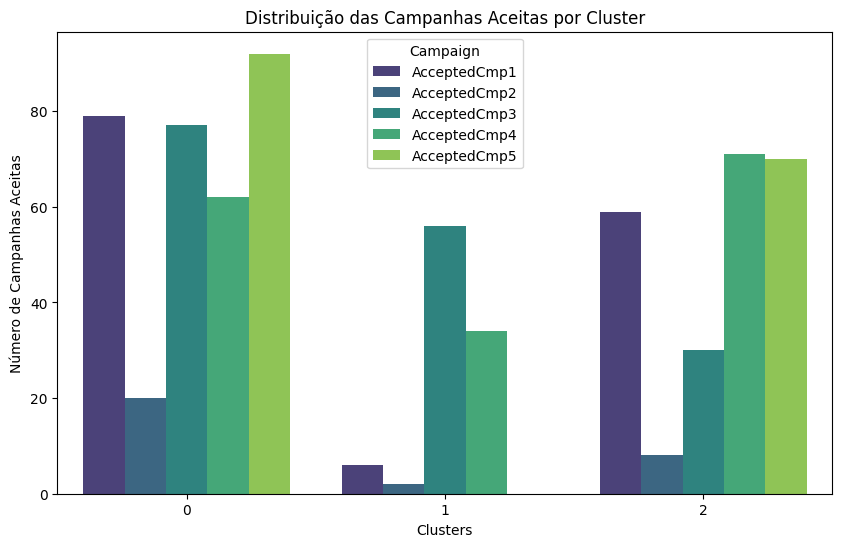

In [ ]:
df_marketing['Cluster_KMeans'] = df_original['Cluster_KMeans']

df_grouped = df_marketing.groupby('Cluster_KMeans').sum().reset_index()

df_melted = df_grouped.melt(id_vars='Cluster_KMeans',
                            var_name='Campaign',
                            value_name='Accepted')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_KMeans', y='Accepted', hue='Campaign', data=df_melted, palette='viridis')

plt.title('Distribuição das Campanhas Aceitas por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Número de Campanhas Aceitas')
plt.legend(title='Campaign')

plt.show()